In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('Automobile_insurance_fraud.csv')

### EDA

In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

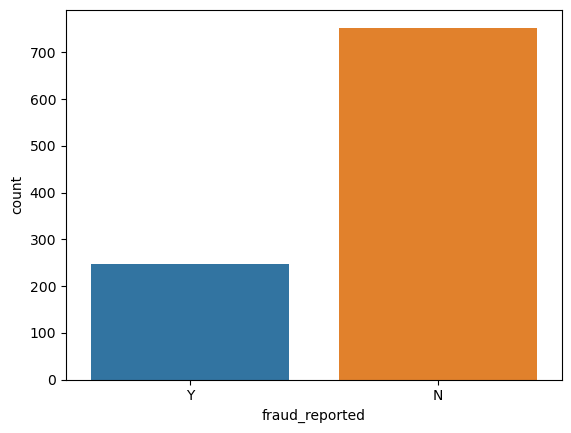

In [8]:
sns.countplot(x='fraud_reported', data=data)
plt.show()


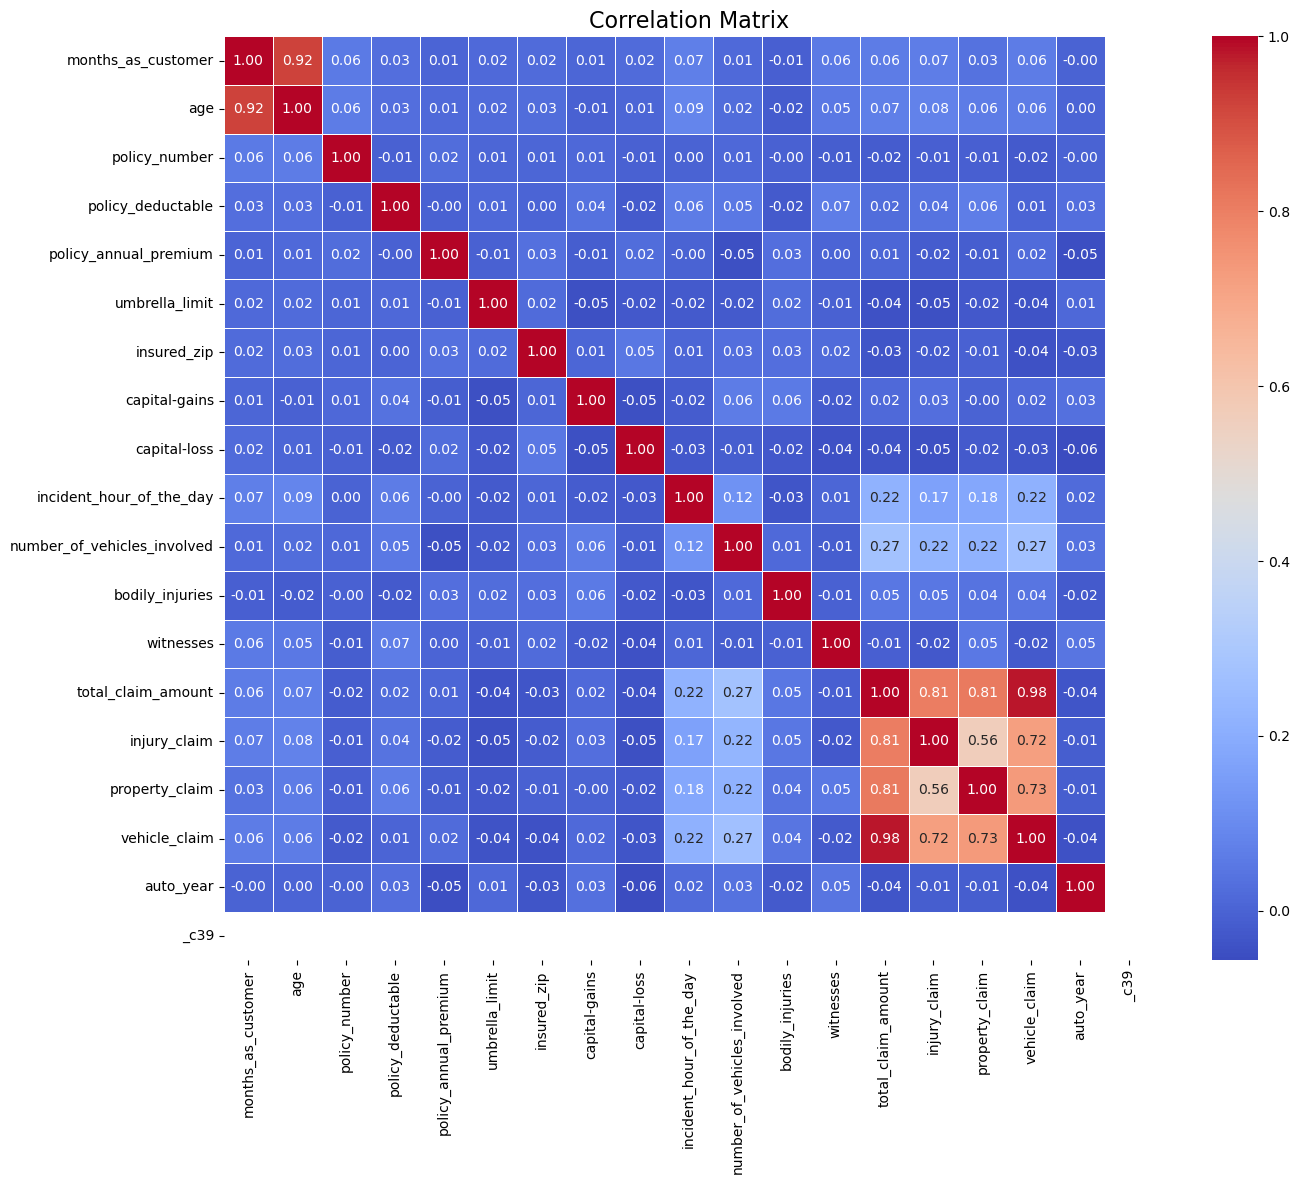

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Feature Engineering

There are some features which are not really helpful for us so we are dropping them

In [4]:
features_to_drop = ['months_as_customer', 'total_claim_amount', 'policy_number',"policy_state","policy_csl","umbrella_limit","insured_zip","insured_education_level","insured_hobbies","incident_state","incident_city","_c39"]
data = data.drop(columns=features_to_drop)

In [21]:
data.head()

,age,policy_bind_date,policy_deductable,policy_annual_premium,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,17-10-2014,1000,1406.91,MALE,craft-repair,husband,53300,0,25-01-2015,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,42,27-06-2006,2000,1197.22,MALE,machine-op-inspct,other-relative,0,0,21-01-2015,...,0,0,?,780,780,3510,Mercedes,E400,2007,Y
2,29,06-09-2000,2000,1413.14,FEMALE,sales,own-child,35100,0,22-02-2015,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,41,25-05-1990,2000,1415.74,FEMALE,armed-forces,unmarried,48900,-62400,10-01-2015,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,44,06-06-2014,1000,1583.91,MALE,sales,unmarried,66000,-46000,17-02-2015,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [5]:
data= data.drop(columns="policy_bind_date")

In [5]:
data.head()

,age,policy_deductable,policy_annual_premium,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,1000,1406.91,MALE,craft-repair,husband,53300,0,25-01-2015,Single Vehicle Collision,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,42,2000,1197.22,MALE,machine-op-inspct,other-relative,0,0,21-01-2015,Vehicle Theft,...,0,0,?,780,780,3510,Mercedes,E400,2007,Y
2,29,2000,1413.14,FEMALE,sales,own-child,35100,0,22-02-2015,Multi-vehicle Collision,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,41,2000,1415.74,FEMALE,armed-forces,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,44,1000,1583.91,MALE,sales,unmarried,66000,-46000,17-02-2015,Vehicle Theft,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [6]:
data= data.drop(columns=["incident_date","insured_relationship","bodily_injuries","auto_model"])

In [7]:
data.replace("?", np.nan, inplace=True)

In [8]:
data.isnull().sum()

age                              0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_occupation               0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
witnesses                        0
police_report_available        343
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_year                        0
fraud_reported                   0
dtype: int64

Handling Missing  Values

All the features have categorical values so I am handling with mode 

In [9]:
columns_to_fill_mode = ['collision_type', 'property_damage', 'police_report_available']
data[columns_to_fill_mode] = data[columns_to_fill_mode].apply(lambda column: column.fillna(column.mode()[0]))

In [10]:
data.head()

,age,policy_deductable,policy_annual_premium,insured_sex,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,...,number_of_vehicles_involved,property_damage,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,48,1000,1406.91,MALE,craft-repair,53300,0,Single Vehicle Collision,Side Collision,Major Damage,...,1,YES,2,YES,6510,13020,52080,Saab,2004,Y
1,42,2000,1197.22,MALE,machine-op-inspct,0,0,Vehicle Theft,Rear Collision,Minor Damage,...,1,NO,0,NO,780,780,3510,Mercedes,2007,Y
2,29,2000,1413.14,FEMALE,sales,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,...,3,NO,3,NO,7700,3850,23100,Dodge,2007,N
3,41,2000,1415.74,FEMALE,armed-forces,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,...,1,NO,2,NO,6340,6340,50720,Chevrolet,2014,Y
4,44,1000,1583.91,MALE,sales,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,...,1,NO,1,NO,1300,650,4550,Accura,2009,N


### Splitting Data

In [12]:
X = data.drop('fraud_reported', axis=1)  
y = data['fraud_reported']

In [13]:
X["insured_sex"] = X["insured_sex"].replace({'MALE': 0, 'FEMALE': 1})

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(X, columns=categorical_columns)

In [15]:
data_encoded.head()

,age,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,injury_claim,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,48,1000,1406.91,0,53300,0,5,1,2,6510,...,0,0,0,0,0,0,1,0,0,0
1,42,2000,1197.22,0,0,0,8,1,0,780,...,0,0,0,0,1,0,0,0,0,0
2,29,2000,1413.14,1,35100,0,7,3,3,7700,...,1,0,0,0,0,0,0,0,0,0
3,41,2000,1415.74,1,48900,-62400,5,1,2,6340,...,0,0,0,0,0,0,0,0,0,0
4,44,1000,1583.91,0,66000,-46000,20,1,1,1300,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [16]:
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


In [17]:
data_encoded.head()

,age,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,injury_claim,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0.990836,-0.222383,0.616705,-1.076953,1.011331,0.953851,-0.956261,-0.823865,0.461838,-0.189283,...,0,0,0,0,0,0,1,0,0,0
1,0.334073,1.412784,-0.242521,-1.076953,-0.901927,0.953851,-0.524475,-0.823865,-1.338700,-1.363822,...,0,0,0,0,1,0,0,0,0,0
2,-1.088913,1.412784,0.642233,0.928546,0.358023,0.953851,-0.668404,1.140056,1.362107,0.054644,...,1,0,0,0,0,0,0,0,0,0
3,0.224613,1.412784,0.652886,0.928546,0.853388,-1.267577,-0.956261,-0.823865,0.461838,-0.224130,...,0,0,0,0,0,0,0,0,0,0
4,0.552994,-0.222383,1.341980,-1.076953,1.467210,-0.683741,1.202666,-0.823865,-0.438431,-1.257232,...,0,0,0,0,0,0,0,0,0,0


### Train_Test_Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.73
Confusion Matrix:
[[138   7]
 [ 47   8]]
Classification Report:
              precision    recall  f1-score   support

           N       0.75      0.95      0.84       145
           Y       0.53      0.15      0.23        55

    accuracy                           0.73       200
   macro avg       0.64      0.55      0.53       200
weighted avg       0.69      0.73      0.67       200

